In [ ]:
# These libraries are needed for the project. Uncomment to install them. 
# To make use of this notebook the appropriate csv files need to be droped in the '/content' folder!
# You need to load the images before procceeding with the script.

# !pip install pandas
# !pip install matplotlib
# !pip install sklearn 

# Crop Yield Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression

In [2]:
# works if the files and the notebook are in the same folder
pwd = !pwd

In [3]:
temperature = pd.read_csv('{}/temp.csv'.format(pwd[0]))
rainfall = pd.read_csv('{}/rainfall.csv'.format(pwd[0]))
pesticide = pd.read_csv('{}/pesticides.csv'.format(pwd[0]))
crop_yield = pd.read_csv('{}/yield.csv'.format(pwd[0]))

In [4]:
crop_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [5]:
# rainfall is presented as an average over multiple decades!
rainfall.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [6]:
pesticide.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [7]:
temperature.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [8]:
print('DF shape crop yield: ',crop_yield.shape)
print('DF shape pesticide: ', pesticide.shape)
print('DF shape rainfall: ', rainfall.shape)
print('DF shape temperature: ',temperature.shape)

DF shape crop yield:  (56717, 12)
DF shape pesticide:  (4349, 7)
DF shape rainfall:  (6727, 3)
DF shape temperature:  (71311, 3)


# EDA
crop yield

In [9]:
crop_yield.info()
crop_yield.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


,Area Code,Element Code,Item Code,Year Code,Year,Value
count,56717.000000,56717.0,56717.000000,56717.000000,56717.000000,56717.000000
mean,125.650422,5419.0,111.611651,1989.669570,1989.669570,62094.660084
std,75.120195,0.0,101.278435,16.133198,16.133198,67835.932856
min,1.000000,5419.0,15.000000,1961.000000,1961.000000,0.000000
25%,58.000000,5419.0,56.000000,1976.000000,1976.000000,15680.000000
50%,122.000000,5419.0,116.000000,1991.000000,1991.000000,36744.000000
75%,184.000000,5419.0,125.000000,2004.000000,2004.000000,86213.000000
max,351.000000,5419.0,489.000000,2016.000000,2016.000000,1000000.000000


In [10]:
crop_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [11]:
crop_yield = crop_yield.drop(['Domain Code', 'Domain', 'Element Code', 'Element', 'Unit', 'Year Code'], axis = 1)

In [12]:
crop_yield.rename(columns={'Value': 'Crop_Yield'}, inplace=True)

In [13]:
crop_yield.Item.unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Wheat', 'Sorghum', 'Soybeans',
       'Cassava', 'Yams', 'Sweet potatoes', 'Plantains and others'],
      dtype=object)

In [14]:
crop_yield.Area.nunique()

212

In [15]:
pesticide.info()
pesticide.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


,Year,Value
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [16]:
pesticide.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [17]:
pesticide.Unit.unique()

array(['tonnes of active ingredients'], dtype=object)

In [18]:
pesticide.Item.unique()

array(['Pesticides (total)'], dtype=object)

In [19]:
pesticide.Element.unique()

array(['Use'], dtype=object)

In [20]:
pesticide.Domain.unique()

array(['Pesticides Use'], dtype=object)

In [21]:
# removing some columns not needed for ML analysis
pesticide = pesticide.drop(['Domain', 'Element', 'Item', 'Unit'], axis = 1)

In [22]:
pesticide.rename(columns={'Value': 'Pesticide_Amount'}, inplace=True)

In [23]:
pesticide

,Area,Year,Pesticide_Amount
0,Albania,1990,121.00
1,Albania,1991,121.00
2,Albania,1992,121.00
3,Albania,1993,121.00
4,Albania,1994,201.00
...,...,...,...
4344,Zimbabwe,2012,3375.53
4345,Zimbabwe,2013,2550.07
4346,Zimbabwe,2014,2185.07
4347,Zimbabwe,2015,2185.07


In [24]:
rainfall.info()
rainfall.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


,Year
count,6727.000000
mean,2001.354839
std,9.530114
min,1985.000000
25%,1993.000000
50%,2001.000000
75%,2010.000000
max,2017.000000


In [25]:
rainfall[' Area'].nunique()

217

In [26]:
temperature.info()
temperature.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      71311 non-null  int64 
 1   country   71311 non-null  object
 2   avg_temp  68774 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


,year
count,71311.000000
mean,1905.799007
std,67.102099
min,1743.000000
25%,1858.000000
50%,1910.000000
75%,1962.000000
max,2013.000000


In [27]:
temperature.country.nunique()

137

In [28]:
rainfall_temperature = pd.merge(rainfall, temperature,  how='left', left_on=['Year',' Area'], right_on = ['year','country'])

In [29]:
rainfall_temperature_pesticide = pd.merge(rainfall_temperature, pesticide,  how='left', left_on=['Year',' Area'], right_on = ['Year','Area'])

In [30]:
crop_yield

,Area Code,Area,Item Code,Item,Year,Crop_Yield
0,2,Afghanistan,56,Maize,1961,14000
1,2,Afghanistan,56,Maize,1962,14000
2,2,Afghanistan,56,Maize,1963,14260
3,2,Afghanistan,56,Maize,1964,14257
4,2,Afghanistan,56,Maize,1965,14400
...,...,...,...,...,...,...
56712,181,Zimbabwe,15,Wheat,2012,24420
56713,181,Zimbabwe,15,Wheat,2013,22888
56714,181,Zimbabwe,15,Wheat,2014,21357
56715,181,Zimbabwe,15,Wheat,2015,19826


In [31]:
merged_table = pd.merge(rainfall_temperature_pesticide, crop_yield,  how='left', left_on=['Year',' Area'], right_on = ['Year','Area'])

In [32]:
# The Area code as well as item code are purpusly left in the table. The will be later applied to an Ml algorihm
final_df = merged_table.drop(['year', 'Area_x', 'Area_y', 'country'], axis = 1)

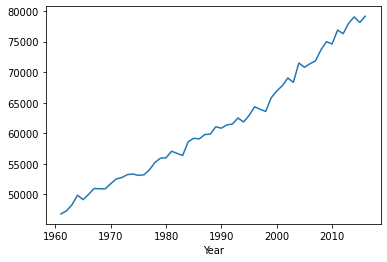

In [33]:
crop_yield.groupby('Year')['Crop_Yield'].mean().plot()

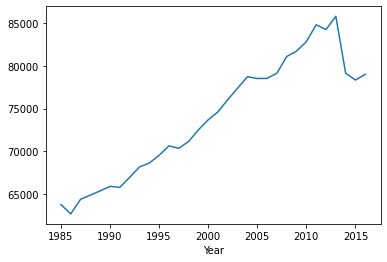

In [34]:
final_df.groupby('Year')['Crop_Yield'].mean().plot();

In [35]:
# Also some object columns needs to be transformed to numerical columns
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56674 entries, 0 to 56673
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Area                          56674 non-null  object 
 1   Year                           56674 non-null  int64  
 2   average_rain_fall_mm_per_year  55435 non-null  object 
 3   avg_temp                       46294 non-null  object 
 4   Pesticide_Amount               34468 non-null  float64
 5   Area Code                      53070 non-null  float64
 6   Item Code                      53070 non-null  float64
 7   Item                           53070 non-null  object 
 8   Crop_Yield                     53070 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 4.3+ MB


In [36]:
# transform the avg_temp to numeric
final_df.avg_temp = pd.to_numeric(final_df.avg_temp)

In [37]:
# Drops those rows with an average rainfall and the value '..'
final_df = final_df[final_df.average_rain_fall_mm_per_year != '..']

In [38]:
#  this function removes commas in the float string. In addition Nan values are ignored as those cause a Attribute Error.
def remove_commas(x):
    try:
        x = x.split(',')
        return x[0]
    except AttributeError:
        pass

In [39]:
# remove the commas in the strings for the column_>
final_df.average_rain_fall_mm_per_year = final_df.average_rain_fall_mm_per_year.apply(remove_commas)

In [40]:
final_df.average_rain_fall_mm_per_year = pd.to_numeric(final_df.average_rain_fall_mm_per_year)

In [41]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56658 entries, 0 to 56673
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Area                          56658 non-null  object 
 1   Year                           56658 non-null  int64  
 2   average_rain_fall_mm_per_year  55419 non-null  float64
 3   avg_temp                       46279 non-null  float64
 4   Pesticide_Amount               34462 non-null  float64
 5   Area Code                      53055 non-null  float64
 6   Item Code                      53055 non-null  float64
 7   Item                           53055 non-null  object 
 8   Crop_Yield                     53055 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 4.3+ MB


Graphical representation of  rainfall, temperature and crop yield

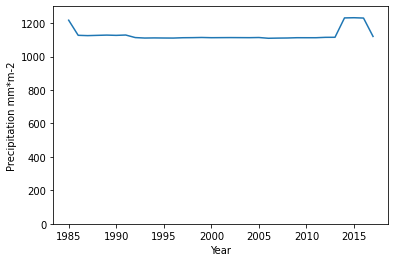

In [42]:
# Rainfall is more or less constant over the years
final_df.groupby('Year').average_rain_fall_mm_per_year.mean().plot()
plt.ylabel('Precipitation mm*m-2')
plt.ylim(0,1300);

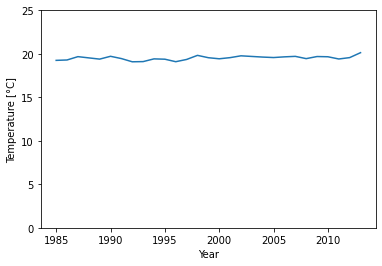

In [43]:
final_df.groupby('Year').avg_temp.mean().plot()
plt.ylabel('Temperature [°C]')
plt.ylim(0,25);

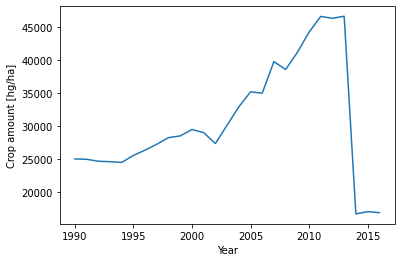

In [44]:
final_df.groupby('Year').Pesticide_Amount.mean().plot();
plt.ylabel('Crop amount [hg/ha]');

Cleaning up the Data

In [45]:
# An example to drop a country, because of missing values
final_df[final_df[' Area'] == 'Andorra'].head()

,Area,Year,average_rain_fall_mm_per_year,avg_temp,Pesticide_Amount,Area Code,Item Code,Item,Crop_Yield
468,Andorra,1985,1010.0,NaN,NaN,NaN,NaN,NaN,NaN
469,Andorra,1986,1010.0,NaN,NaN,NaN,NaN,NaN,NaN
470,Andorra,1987,1010.0,NaN,NaN,NaN,NaN,NaN,NaN
471,Andorra,1989,1010.0,NaN,NaN,NaN,NaN,NaN,NaN
472,Andorra,1990,1010.0,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Some countries appear only because of their appearence in some datasets. But other datasets are not providing those coutries with values.
# Hence those can be droped out of the table
final_df.groupby(" Area").mean()

,Year,average_rain_fall_mm_per_year,avg_temp,Pesticide_Amount,Area Code,Item Code,Crop_Yield
Area,,,,,,,
Afghanistan,2000.966942,327.0,15.281111,NaN,2.0,53.500000,52091.125000
Albania,1999.632353,1485.0,16.222520,683.469550,3.0,99.903704,56858.488889
Algeria,2000.986667,89.0,17.447910,5393.211473,4.0,59.241611,59504.744966
American Samoa,2001.098361,NaN,NaN,NaN,5.0,131.000000,48197.133333
Andorra,2001.354839,1010.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
Virgin Islands (U.S.),2001.354839,NaN,NaN,NaN,NaN,NaN,NaN
West Bank and Gaza,2001.354839,402.0,NaN,NaN,NaN,NaN,NaN
Yemen,2001.147651,167.0,NaN,621.285385,249.0,77.810811,52546.128378


In [47]:
# Some missing values can be easily filled with fillna and mean. It is fully true for the item code and with a good approximation for average temperature.
filling_missing_values = final_df.groupby(" Area")[['avg_temp', 'Area Code']].transform(lambda x: x.fillna(x.mean()))

In [48]:
# New values are concatenated with the final data frame
final_df = pd.concat([final_df.drop(['avg_temp', 'Area Code'], axis = 1), filling_missing_values], axis = 1)

In [49]:
# There are some missing valaes in the table. Before dropping them some can be adequately replaced. Such as 
# Area Code 
final_df.isnull().sum()

 Area                                0
Year                                 0
average_rain_fall_mm_per_year     1239
Pesticide_Amount                 22196
Item Code                         3603
Item                              3603
Crop_Yield                        3603
avg_temp                          8211
Area Code                         3161
dtype: int64

In [50]:
# Dropping all NaNs. However, if there would be more time, filling with appropriate values would be the better solution!
final_df = final_df.dropna()

In [51]:
# more than half of the data frame is missing now.
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30017 entries, 145 to 56672
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Area                          30017 non-null  object 
 1   Year                           30017 non-null  int64  
 2   average_rain_fall_mm_per_year  30017 non-null  float64
 3   Pesticide_Amount               30017 non-null  float64
 4   Item Code                      30017 non-null  float64
 5   Item                           30017 non-null  object 
 6   Crop_Yield                     30017 non-null  float64
 7   avg_temp                       30017 non-null  float64
 8   Area Code                      30017 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.3+ MB


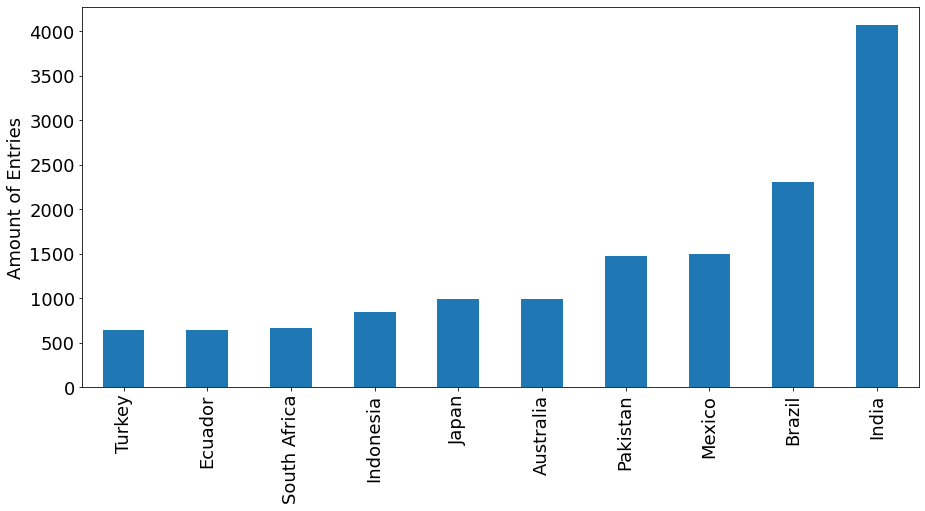

In [52]:
# the top countries with most entries
final_df.groupby(' Area')['Crop_Yield'].count().sort_values().tail(10).plot(kind='bar', figsize =(15, 7));
plt.ylabel('Amount of Entries', fontsize = 18);
plt.yticks(fontsize = 18)
plt.xlabel(None);
plt.xticks(fontsize = 18);

# Machine learning approach

Here we seperate two countries, from the data frame. One country has a high crop yield while the other has a low crop yield. Later, a trained model is used to predict the crop yield.  

In [ ]:
# high crop yield
# here I pick UK, but any other country should work
final_df[final_df.Crop_Yield > 300000]

,Area,Year,average_rain_fall_mm_per_year,Pesticide_Amount,Item Code,Item,Crop_Yield,avg_temp,Area Code
382,Algeria,2012,89.0,17379.76,116.0,Potatoes,304291.0,17.910000,4.0
387,Algeria,2013,89.0,17278.65,116.0,Potatoes,303218.0,17.650000,4.0
402,Algeria,2016,89.0,14258.22,116.0,Potatoes,306198.0,17.447910,4.0
1821,Australia,1996,534.0,31185.00,116.0,Potatoes,312853.0,16.120000,10.0
1828,Australia,1996,534.0,31185.00,116.0,Potatoes,312853.0,20.060000,10.0
...,...,...,...,...,...,...,...,...,...
54104,United Kingdom,2013,1220.0,17673.46,116.0,Potatoes,408993.0,8.390000,229.0
54106,United Kingdom,2013,1220.0,17673.46,116.0,Potatoes,408993.0,9.910000,229.0
54108,United Kingdom,2014,1220.0,18392.45,116.0,Potatoes,419220.0,9.471556,229.0
54110,United Kingdom,2015,1220.0,18302.28,116.0,Potatoes,433178.0,9.471556,229.0


In [53]:
final_df[final_df[' Area'] == 'United Kingdom']

,Area,Year,average_rain_fall_mm_per_year,Pesticide_Amount,Item Code,Item,Crop_Yield,avg_temp,Area Code
53878,United Kingdom,1990,1220.0,29517.00,116.0,Potatoes,365161.0,9.560000,229.0
53879,United Kingdom,1990,1220.0,29517.00,15.0,Wheat,69712.0,9.560000,229.0
53880,United Kingdom,1990,1220.0,29517.00,116.0,Potatoes,365161.0,10.400000,229.0
53881,United Kingdom,1990,1220.0,29517.00,15.0,Wheat,69712.0,10.400000,229.0
53882,United Kingdom,1990,1220.0,29517.00,116.0,Potatoes,365161.0,10.400000,229.0
...,...,...,...,...,...,...,...,...,...
54109,United Kingdom,2014,1220.0,18392.45,15.0,Wheat,85786.0,9.471556,229.0
54110,United Kingdom,2015,1220.0,18302.28,116.0,Potatoes,433178.0,9.471556,229.0
54111,United Kingdom,2015,1220.0,18302.28,15.0,Wheat,89760.0,9.471556,229.0
54112,United Kingdom,2016,1220.0,19277.79,116.0,Potatoes,386547.0,9.471556,229.0


In [54]:
UK_DF = final_df[final_df[' Area'] == 'United Kingdom']

In [55]:
UK_DF

,Area,Year,average_rain_fall_mm_per_year,Pesticide_Amount,Item Code,Item,Crop_Yield,avg_temp,Area Code
53878,United Kingdom,1990,1220.0,29517.00,116.0,Potatoes,365161.0,9.560000,229.0
53879,United Kingdom,1990,1220.0,29517.00,15.0,Wheat,69712.0,9.560000,229.0
53880,United Kingdom,1990,1220.0,29517.00,116.0,Potatoes,365161.0,10.400000,229.0
53881,United Kingdom,1990,1220.0,29517.00,15.0,Wheat,69712.0,10.400000,229.0
53882,United Kingdom,1990,1220.0,29517.00,116.0,Potatoes,365161.0,10.400000,229.0
...,...,...,...,...,...,...,...,...,...
54109,United Kingdom,2014,1220.0,18392.45,15.0,Wheat,85786.0,9.471556,229.0
54110,United Kingdom,2015,1220.0,18302.28,116.0,Potatoes,433178.0,9.471556,229.0
54111,United Kingdom,2015,1220.0,18302.28,15.0,Wheat,89760.0,9.471556,229.0
54112,United Kingdom,2016,1220.0,19277.79,116.0,Potatoes,386547.0,9.471556,229.0


In [56]:
# UK is droped out of the dataset
final_df = final_df[final_df[' Area'] != 'United Kingdom']

In [57]:
# low crop yield
# here I pick UK, but any other country should work
final_df[final_df.Crop_Yield < 100000]

,Area,Year,average_rain_fall_mm_per_year,Pesticide_Amount,Item Code,Item,Crop_Yield,avg_temp,Area Code
145,Albania,1990,1485.0,121.00,56.0,Maize,36613.0,16.370000,3.0
146,Albania,1990,1485.0,121.00,116.0,Potatoes,66667.0,16.370000,3.0
147,Albania,1990,1485.0,121.00,27.0,"Rice, paddy",23333.0,16.370000,3.0
148,Albania,1990,1485.0,121.00,83.0,Sorghum,12500.0,16.370000,3.0
149,Albania,1990,1485.0,121.00,236.0,Soybeans,7000.0,16.370000,3.0
...,...,...,...,...,...,...,...,...,...
56668,Zimbabwe,2016,657.0,2185.07,27.0,"Rice, paddy",22828.0,20.792963,181.0
56669,Zimbabwe,2016,657.0,2185.07,83.0,Sorghum,2688.0,20.792963,181.0
56670,Zimbabwe,2016,657.0,2185.07,236.0,Soybeans,12727.0,20.792963,181.0
56671,Zimbabwe,2016,657.0,2185.07,122.0,Sweet potatoes,22212.0,20.792963,181.0


In [58]:
Albania_DF = final_df[final_df[' Area'] == 'Albania']

In [59]:
# Albania is droped out of the dataset
final_df = final_df[final_df[' Area'] != 'Albania']

In [60]:
y = final_df['Crop_Yield']
X = final_df.drop(['Item', ' Area', 'Crop_Yield', 'Year'], axis = 1)

In [61]:
y_uk = UK_DF['Crop_Yield']
X_uk = UK_DF.drop(['Item', ' Area', 'Crop_Yield', 'Year'], axis = 1)

In [62]:
y_albania = Albania_DF['Crop_Yield']
X_albania = Albania_DF.drop(['Item', ' Area', 'Crop_Yield', 'Year'], axis = 1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

ML Algorithms

Random Forest

In [64]:
# Random Forest
random_forest_regression = RandomForestRegressor()
random_forest_regression.fit(X_train, y_train)

# Calculate the estimated value for each data point
y_pred = random_forest_regression.predict(X_test)

In [65]:
# Calcualte the R-squared for our model
print("R-squared:", r2_score(y_test, y_pred).round(3))
print("Mean Squared Error", mean_squared_error(y_test, y_pred).round(2))
print("Root Mean Squared Error", (mean_squared_error(y_test, y_pred)**(1/2)).round(2))

R-squared: 0.972
Mean Squared Error 190982918.86
Root Mean Squared Error 13819.66


UK - random Forest

In [66]:
y_pred = random_forest_regression.predict(X_uk)

In [67]:
# Calcualte the R-squared for our model
print("R-squared:", r2_score(y_uk, y_pred).round(3))
print("Mean Squared Error", mean_squared_error(y_uk, y_pred).round(2))
print("Root Mean Squared Error", (mean_squared_error(y_uk, y_pred)**(1/2)).round(2))

R-squared: 0.94
Mean Squared Error 1665542015.54
Root Mean Squared Error 40811.05


Albania - random forest

In [68]:
y_pred = random_forest_regression.predict(X_albania)

In [69]:
# Calcualte the R-squared for our model
print("R-squared:", r2_score(y_albania, y_pred).round(3))
print("Mean Squared Error", mean_squared_error(y_albania, y_pred).round(2))
print("Root Mean Squared Error", (mean_squared_error(y_albania, y_pred)**(1/2)).round(2))

R-squared: 0.577
Mean Squared Error 1812520365.1
Root Mean Squared Error 42573.71


Linear Regression

In [70]:
# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Calculate the estimated value for each data point
y_pred = linear_regression.predict(X_test)

In [71]:
# Calcualte the R-squared for our model
print("R-squared:", r2_score(y_test, y_pred).round(3))
print("Mean Squared Error", mean_squared_error(y_test, y_pred).round(2))
print("Root Mean Squared Error", (mean_squared_error(y_test, y_pred)**(1/2)).round(2))

R-squared: 0.038
Mean Squared Error 6672480888.14
Root Mean Squared Error 81685.26


UK - linear regression

In [72]:
y_pred = random_forest_regression.predict(X_uk)

In [73]:
# Calcualte the R-squared for our model
print("R-squared:", r2_score(y_uk, y_pred).round(3))
print("Mean Squared Error", mean_squared_error(y_uk, y_pred).round(2))
print("Root Mean Squared Error", (mean_squared_error(y_uk, y_pred)**(1/2)).round(2))

R-squared: 0.94
Mean Squared Error 1665542015.54
Root Mean Squared Error 40811.05


Albania - linear regression

In [74]:
y_pred = random_forest_regression.predict(X_albania)

In [75]:
# Calcualte the R-squared for our model
print("R-squared:", r2_score(y_albania, y_pred).round(3))
print("Mean Squared Error", mean_squared_error(y_albania, y_pred).round(2))
print("Root Mean Squared Error", (mean_squared_error(y_albania, y_pred)**(1/2)).round(2))

R-squared: 0.577
Mean Squared Error 1812520365.1
Root Mean Squared Error 42573.71


Bayes Regression

In [ ]:
# Bayes regression
bayes_regression = BayesianRidge()
bayes_regression.fit(X_train, y_train)

# Calculate the estimated value for each data point
y_pred = bayes_regression.predict(X_test)

In [ ]:
# Calcualte the R-squared for our model
print("R-squared:", r2_score(y_test, y_pred).round(3))
print("Mean Squared Error", mean_squared_error(y_test, y_pred).round(2))
print("Root Mean Squared Error", (mean_squared_error(y_test, y_pred)**(1/2)).round(2))

R-squared: 0.044
Mean Squared Error 6597422218.14
Root Mean Squared Error 81224.52


This section onvestigates the feature importance

In [ ]:
# Please checkout the link
# https://www.kaggle.com/code/ryanholbrook/mutual-information

discrete_features = X.dtypes == int

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_train, y_train, discrete_features)
mi_scores  # show a few features with their MI scores

Pesticide_Amount                 2.666564
Area Code                        1.658490
average_rain_fall_mm_per_year    1.639100
Item Code                        1.288885
avg_temp                         0.223568
Name: MI Scores, dtype: float64